# Neural Network Training on noisy MNIST images
This notebook trains a neural network of 1 dense layer of 128 neurons on increasingly noisy images of numbers from the MNIST database. It shows the effects of training a network on images with and without noise when testing the accuracy of the network's predictions.

First we will need to import the necessary modules and define the noise function that will make our images more 'unclear'.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

def add_noise_to_mnist(images, ynoise):
    ''' Adds noise of a normal distrubtion within given range `ynoise` to an image input'''
    noise = np.random.uniform(0, ynoise, images.shape) # generate noisy points from random dist
    noisy_images = images + noise # add noise to images
    return np.clip(noisy_images, 0, 255) # output data limited to 255

## Construction and Training
Now we will import the MNIST training and testing sets that consist of images and labels, before normalising them. The training set of images `x_train` will be used to 'train' our neural network `model` to be able to detect the number displayed within each image and test its own accuracy against the associated labels `y_train`. Then the network will be assessed using the testing set (`x_test` and `y_test`) also imported from MNIST.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # load MNIST training and test images with labels

# normalise data
x_train = x_train / 255.0
x_test = x_test / 255.0

# create neural network with 128 neurons in hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 28x28 2D pixel array into 1D array of 784 elements
    keras.layers.Dense(128, activation='relu'), # hidden layer of 128 neurons of relu activation
    keras.layers.Dense(10, activation='softmax') # output layer
])

# compile network
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=0.3), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=100, epochs=5) # train model on training set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2) # test model on testing set
print('Test accuracy: ' + str(test_acc))

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


600/600 [==============================] - 10s 13ms/step - loss: 0.3121 - accuracy: 0.9075
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.1452 - accuracy: 0.9577
Epoch 3/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1048 - accuracy: 0.9691
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0827 - accuracy: 0.9752
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0683 - accuracy: 0.9797
313/313 - 1s - loss: 0.0786 - accuracy: 0.9755 - 625ms/epoch - 2ms/step
Test accuracy: 0.9754999876022339


An accuracy of >95% has been achieved on the testing set. Now it remains to see how our network will do with noisy test images.

## Noisy Testing
We can now define a function `TestNoisy` that adds noise to our MNIST image set (using our previously defined function), tests the network against them and returns the accuracy with increasing noise. It will also generate a plot so that we can visualise the trend of accuracy with increasing noise.

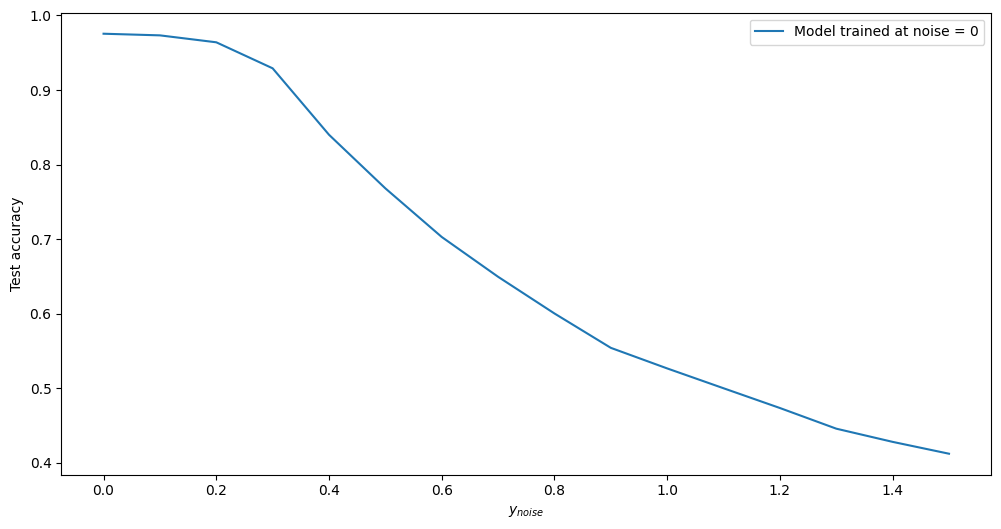

[0.9754999876022339,
 0.9732999801635742,
 0.9639999866485596,
 0.929099977016449,
 0.8399999737739563,
 0.7681000232696533,
 0.7028999924659729,
 0.6495000123977661,
 0.6003000140190125,
 0.5541999936103821,
 0.5266000032424927,
 0.5,
 0.47350001335144043,
 0.4458000063896179,
 0.42809998989105225,
 0.412200003862381]

In [3]:
def TestNoisy(model,x_test,y_test,ynoise,train_noise):
  '''Tests the accuracy an input neural network on noisy MNIST images and produces a plot against input parameter ynoise'''
  test_accuracies = [] # initialise accuracy array
  for noise in ynoise:
      x_test_noisy = add_noise_to_mnist(x_test, noise) # make test images noisy
      test_loss, test_acc = model.evaluate(x_test_noisy, y_test, verbose = 0) # accuracy of model on noisy images
      test_accuracies.append(test_acc) # update accuracies

  # plot accuracy against noise level
  fig = plt.figure(figsize=(12, 6))
  plt.plot(ynoise, test_accuracies, label = 'Model trained at noise = ' + str(train_noise))
  plt.xlabel("$y_{noise}$")
  plt.ylabel("Test accuracy")
  plt.legend()
  plt.show()

  return test_accuracies

ynoise = np.linspace(0,1.5,16) # increasing noise levels to 1
TestNoisy(model,x_test,y_test,ynoise,0) # test network against increasing noisy images



As we can see from the graph, our neural network becomes less accurate at prediciting the number shown in each image when the images becomes more noisy (expected), especially at noises above 0.2. Now, we can see if we can improve this by training our network on a training set with noise before testing on the noisy set. We will redefine the network every time such that it does not fit to previous data in each iteration.

Epoch 1/5
600/600 [==============================] - 4s 6ms/step - loss: 0.3051 - accuracy: 0.9107
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1439 - accuracy: 0.9583
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1032 - accuracy: 0.9704
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0813 - accuracy: 0.9765
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0667 - accuracy: 0.9804


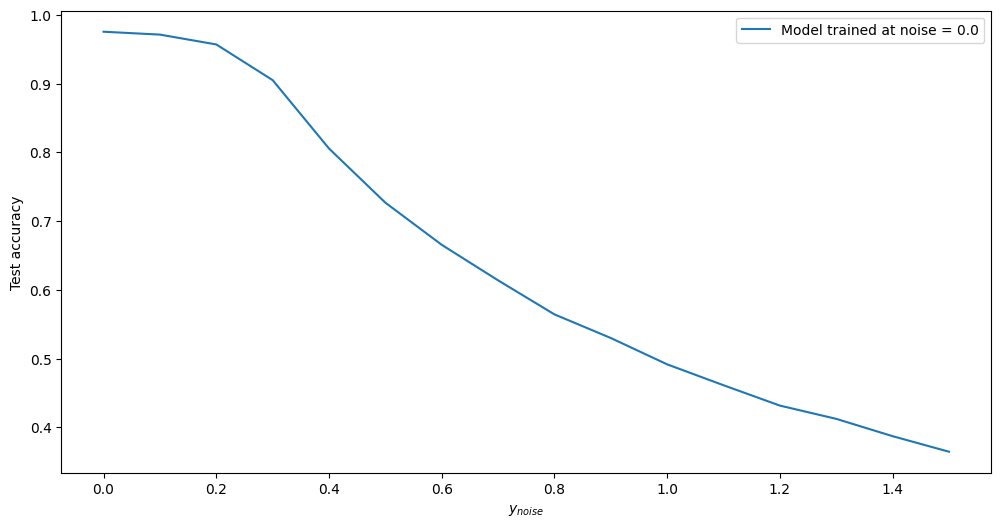

Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 0.3242 - accuracy: 0.9031
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1479 - accuracy: 0.9575
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.1065 - accuracy: 0.9694
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0852 - accuracy: 0.9752
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0709 - accuracy: 0.9792


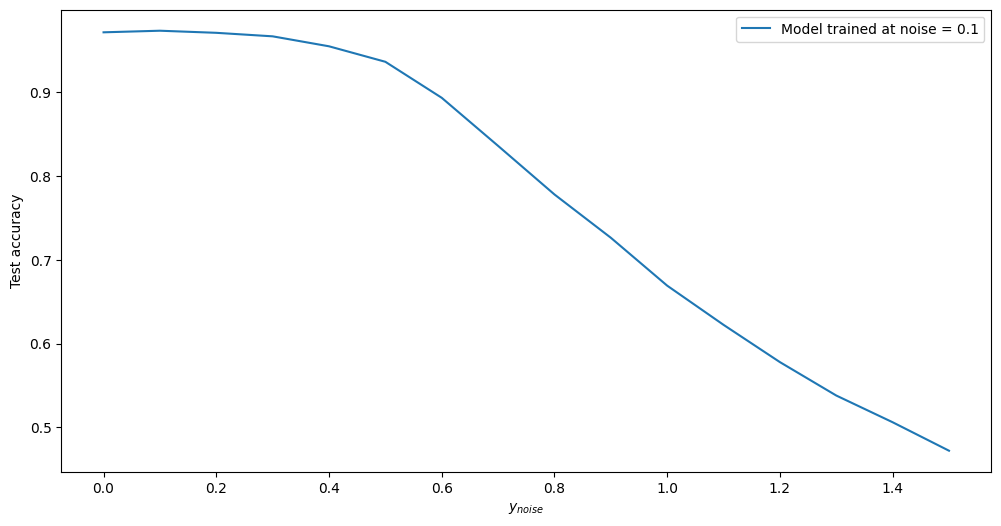

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3329 - accuracy: 0.8985
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1503 - accuracy: 0.9558
Epoch 3/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1089 - accuracy: 0.9676
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0855 - accuracy: 0.9751
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0698 - accuracy: 0.9795


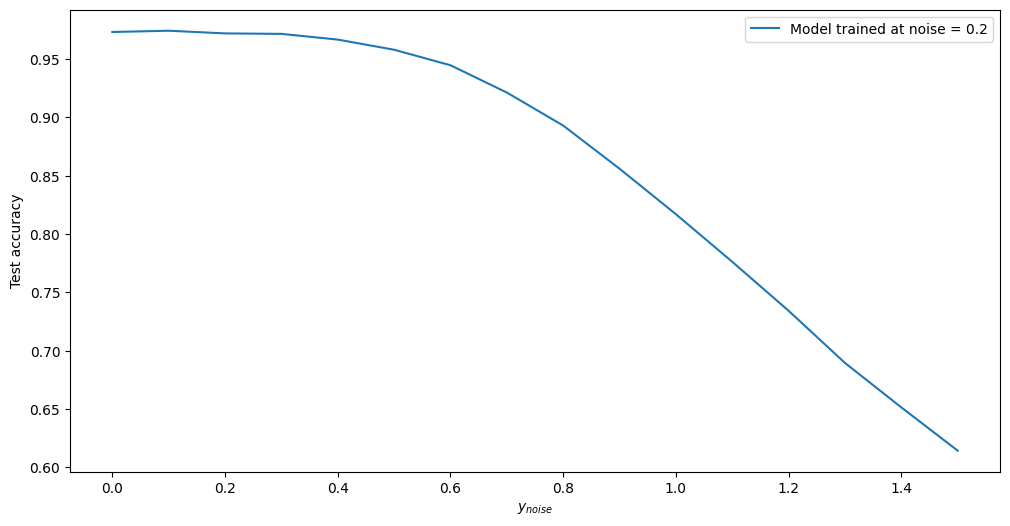

Epoch 1/5
600/600 [==============================] - 4s 6ms/step - loss: 0.3710 - accuracy: 0.8859
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1616 - accuracy: 0.9524
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.1174 - accuracy: 0.9645
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0930 - accuracy: 0.9723
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0763 - accuracy: 0.9775


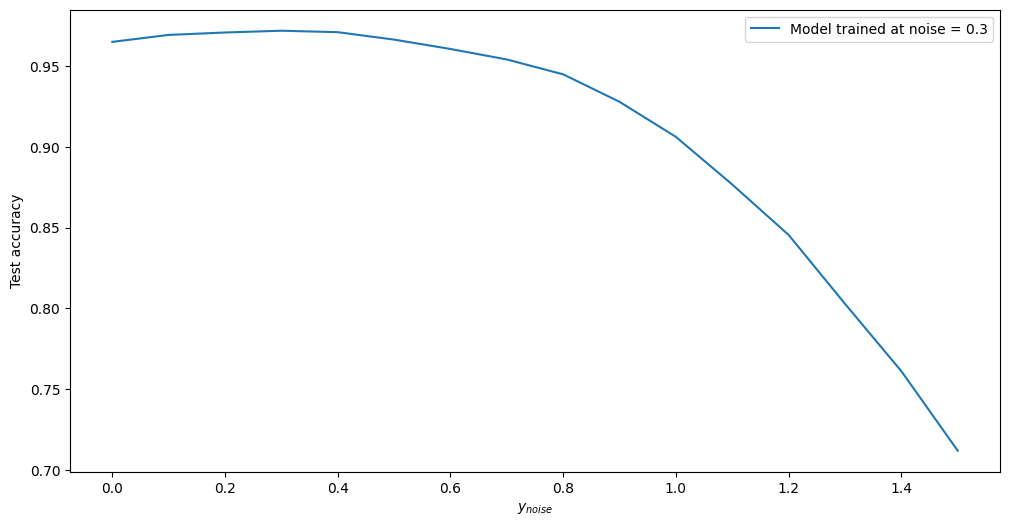

Epoch 1/5
600/600 [==============================] - 3s 4ms/step - loss: 0.4496 - accuracy: 0.8580
Epoch 2/5
600/600 [==============================] - 3s 6ms/step - loss: 0.1885 - accuracy: 0.9435
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1436 - accuracy: 0.9573
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1167 - accuracy: 0.9641
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0981 - accuracy: 0.9700


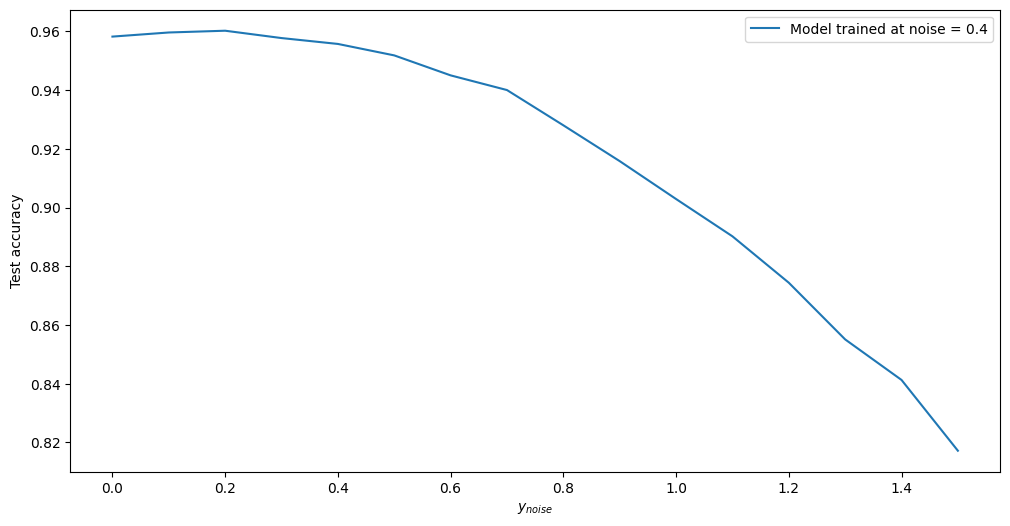

Epoch 1/5
600/600 [==============================] - 2s 4ms/step - loss: 0.5334 - accuracy: 0.8292
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.2153 - accuracy: 0.9346
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.1591 - accuracy: 0.9517
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.1292 - accuracy: 0.9609
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1079 - accuracy: 0.9672


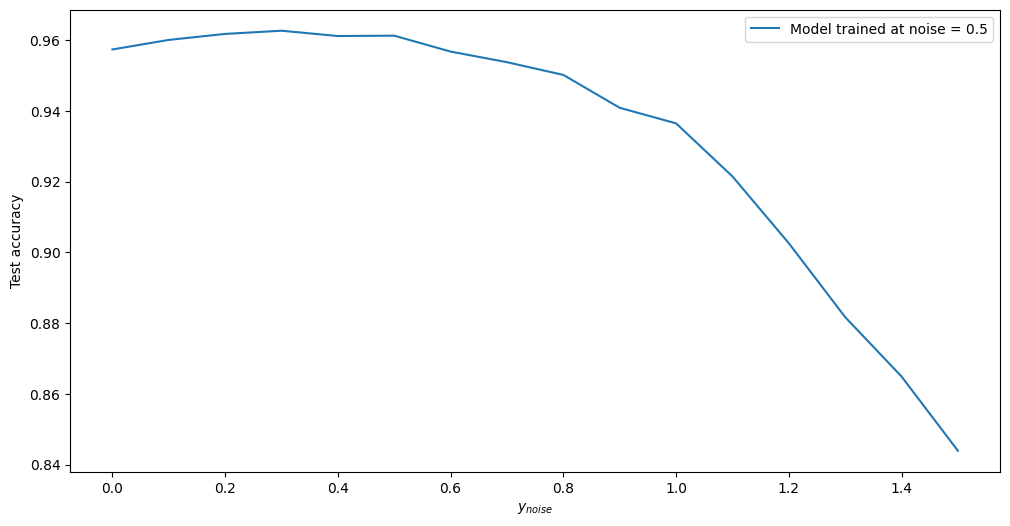

Epoch 1/5
600/600 [==============================] - 3s 4ms/step - loss: 1.7273 - accuracy: 0.3812
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 0.6548 - accuracy: 0.7875
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.3943 - accuracy: 0.8822
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.3357 - accuracy: 0.9006
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 0.3051 - accuracy: 0.9099


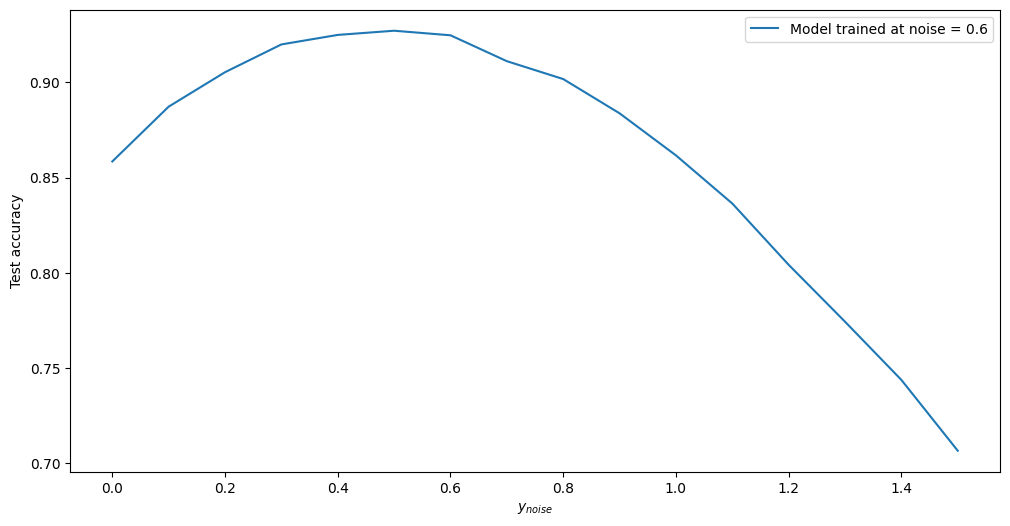

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 2.1251 - accuracy: 0.2055
Epoch 2/5
600/600 [==============================] - 2s 4ms/step - loss: 2.1235 - accuracy: 0.1944
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 1.9464 - accuracy: 0.2510
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 1.7754 - accuracy: 0.3336
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 1.7787 - accuracy: 0.3378


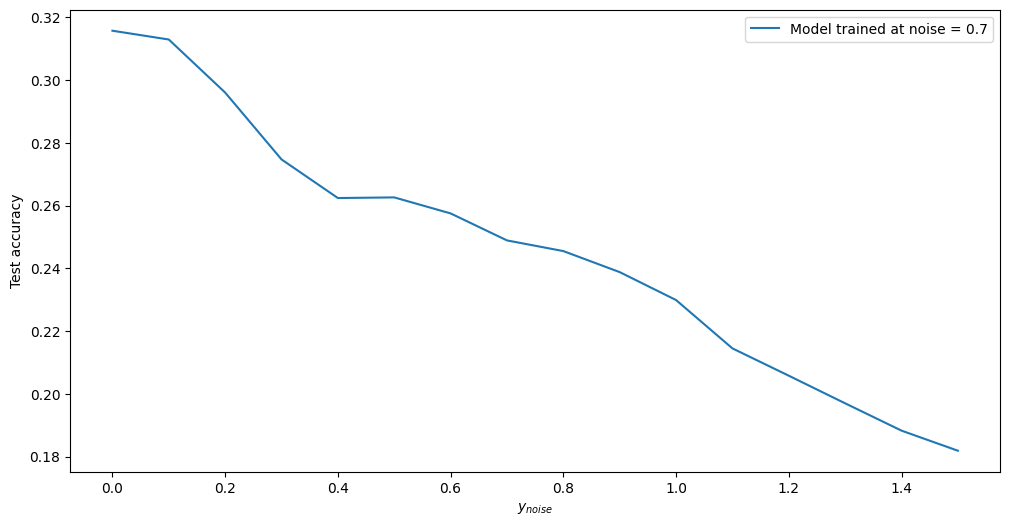

Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 2.0294 - accuracy: 0.2436
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 1.7318 - accuracy: 0.3399
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 1.5790 - accuracy: 0.4067
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 1.7805 - accuracy: 0.3433
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 2.0241 - accuracy: 0.1937


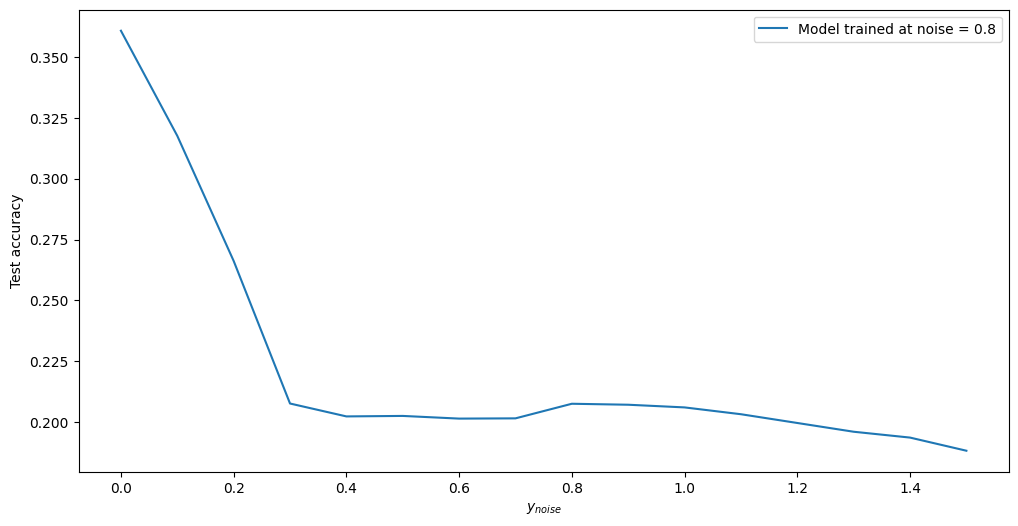

In [4]:
training_noises = np.linspace(0,0.8,9) # training noise range
accuracies = [] # initialise array
for i in training_noises:
  # create fresh model
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 28x28 2D pixel array into 1D array of 784 elements
    keras.layers.Dense(128, activation='relu'), # hidden layer of 128 neurons of relu activation
    keras.layers.Dense(10, activation='softmax')]) # output layer
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=0.3), metrics=['accuracy'])

  # test on noisy
  x_train_noisy = add_noise_to_mnist(x_train, i) # add noise to training images
  model.fit(x_train_noisy, y_train, batch_size=100, epochs=5) # train network on noisy images
  test_accuracy = TestNoisy(model,x_test,y_test,ynoise,round(i,1)) # test network on noisy images and produce graph
  accuracies.append(test_accuracy) # update accuracies

Let's produce a plot of all these lines on one graph so that we might be able to determine which noise level allows our network to perform the best on noisy images within our specified range.

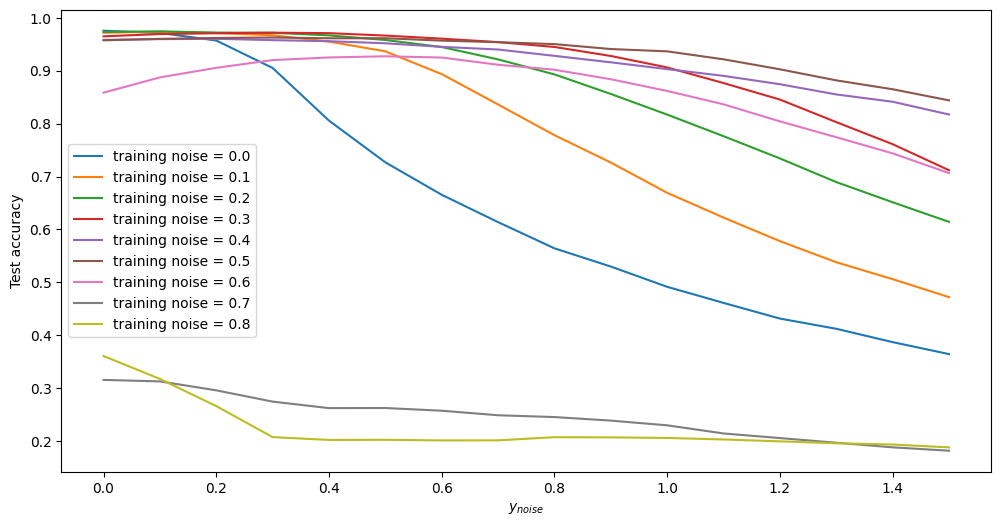

In [5]:
fig = plt.figure(figsize=(12, 6))
# plot each curve
for j in range(len(training_noises)):
  plt.plot(ynoise, accuracies[j], label = "training noise = " + str(round(training_noises[j],1)))
  plt.legend()
plt.xlabel("$y_{noise}$")
plt.ylabel("Test accuracy")
plt.show()

## Conclusion
As we can see from the graph above, a training noise between 0.4 and 0.6 leads to the best 'performance' of the network, where we are defining the performance as the highest continual testing accuracy over the `ynoise` range. Training noises >0.6/0.7 consistently result in very low testing accuracies across the whole range. This is most likely attributed to the fact that the images become too unintelligible with higher noise levels for the network to successfully train on to a high accuracy at the chosen learning rate, as evidenced by the sudden drop in training accuracies for noises above this range. Otherwise, increased noise levels during training has shown to produce higher accuracies on tests each time the noise was increased up until around 0.6. Increasing the number of epochs would lead to overfitting on the training data and may result in lower accuracies when training. On top of this, higher noises may be overfitting to 'noisy' images such that they return low accuracies when determining cleaner images.